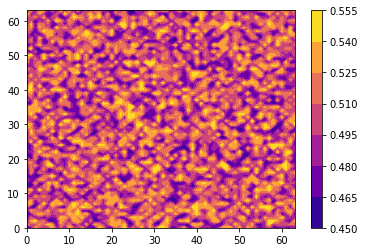

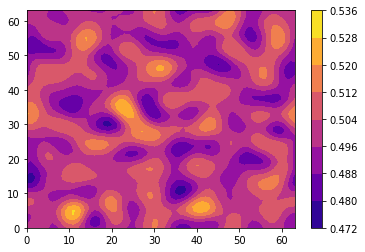

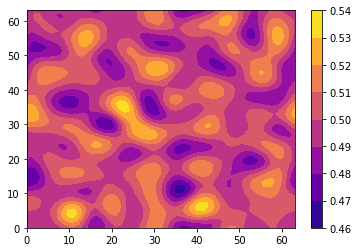

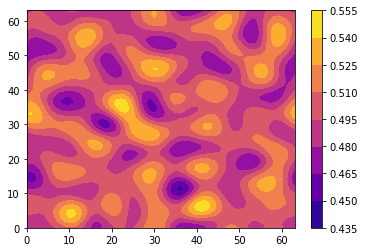

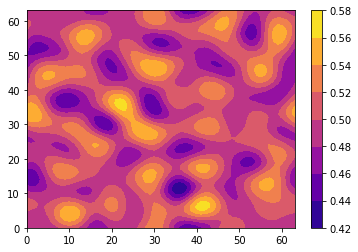

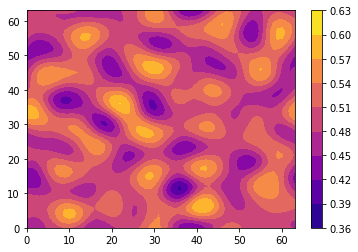

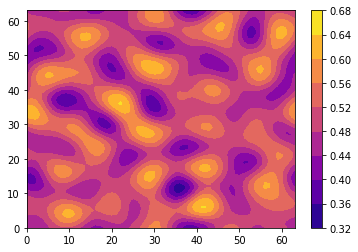

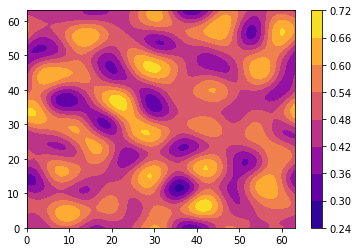

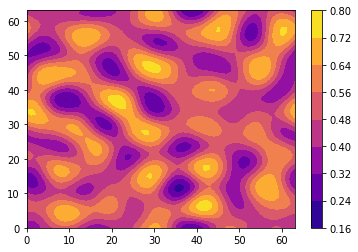

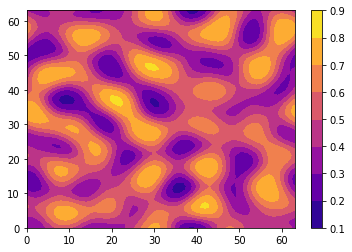

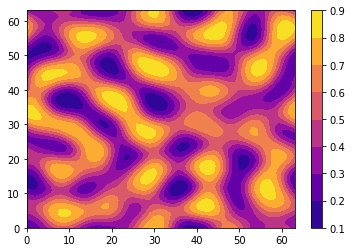

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Nx = 64
Ny = 64
c = np.zeros([Nx,Ny])

for i in range(Nx):
    for j in range(Ny):
        c[i,j] = 0.5 + 0.1*(0.5-np.random.rand())

X,Y = np.meshgrid(range(Nx),range(Ny))        
plt.contourf(X,Y,c,cmap = 'plasma')
plt.colorbar()
plt.show()

dt = 0.5
cnew = c
delkx = 2*np.pi/Nx
delky = 2*np.pi/Ny
A = 1 
M = 1
kappa = 1

for m in range(20):
    for n in range(5):
        mult = np.multiply(1-cnew,1-2*cnew)
        g = 2*A*np.multiply(cnew,mult)
        ghat = np.fft.fft2(g)
        chat = np.fft.fft2(cnew)
        
        for i in range(Nx):
            if i <= Nx/2:
                kx = i*delkx
            else:
                kx = (i-Nx)*delkx
            for j in range(Ny):
                if j <= Ny/2:
                    ky = j*delky
                else:
                    ky = (j-Ny)*delky
                    
                k2 = kx**2 + ky**2
                k4 = k2**2
                chat[i,j] = (chat[i,j] - M*dt*k2*ghat[i,j])/(1+2*M*kappa*k4*dt)
            
        cnew = np.fft.ifft2(chat).real
    
    X,Y = np.meshgrid(range(Nx),range(Ny))        
    plt.contourf(X,Y,cnew,cmap = 'plasma')
    plt.colorbar()    
    plt.show()